# ПРОГНОЗИРОВАНИЕ СТОИМОСТИ АВИАБИЛЕТОВ

![](https://feeds.abplive.com/onecms/images/uploaded-images/2021/09/08/634259599cd6f60c24f9e67a5680c064_original.jpg)

<p>
    Авиакомпании устанавливают цены на свои услуги в попытке максимизировать прибыльность. С годами ценообразование на авиабилеты становится все более сложным и в настоящее время в значительной степени определяется компьютеризированными системами управления доходностью.</p>
    
<p>
    На стоимость авиабилета влияет ряд факторов, таких как продолжительность полета, дни, оставшиеся до вылета, время прибытия и отправления рейса и т.д. Авиакомпании могут снижать стоимость в то время, когда им необходимо завоевать популярность на рынке, а также в то время, когда билеты становятся менее доступными. Они могут максимизировать затраты. Цена может зависеть от различных факторов. Каждый фактор имеет свои собственные правила и алгоритмы, позволяющие соответствующим образом устанавливать цену. Последние достижения в области искусственного интеллекта (ИИ) и машинного обучения (ML) позволяют выводить такие правила и моделировать изменение цен.
</p>

In [3]:
# Импорт всех необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os

In [4]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)

In [5]:
# Давайте посмотрим, что содержится в этих данных
df=pd.read_csv('Clean_Dataset.csv', index_col='Unnamed: 0')
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
# Краткая информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [7]:
# Статистическое описание данных
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [9]:
df[['duration','days_left', 'price']].corr().T

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [10]:
# Размер данных
df.shape

(300153, 11)

In [11]:
# Группируем DataFrame по столбцам 'flight' и 'airline', сохраняя их как столбцы в результате
# и считаем количество не-null значений в каждой группе для всех остальных столбцов
df1 = df.groupby(['flight', 'airline'], as_index=False).count()

# Считаем количество вхождений каждого уникального значения в столбце 'airline' в df1
df1.airline.value_counts()


airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

<b> Indigo становится самой популярной авиакомпанией

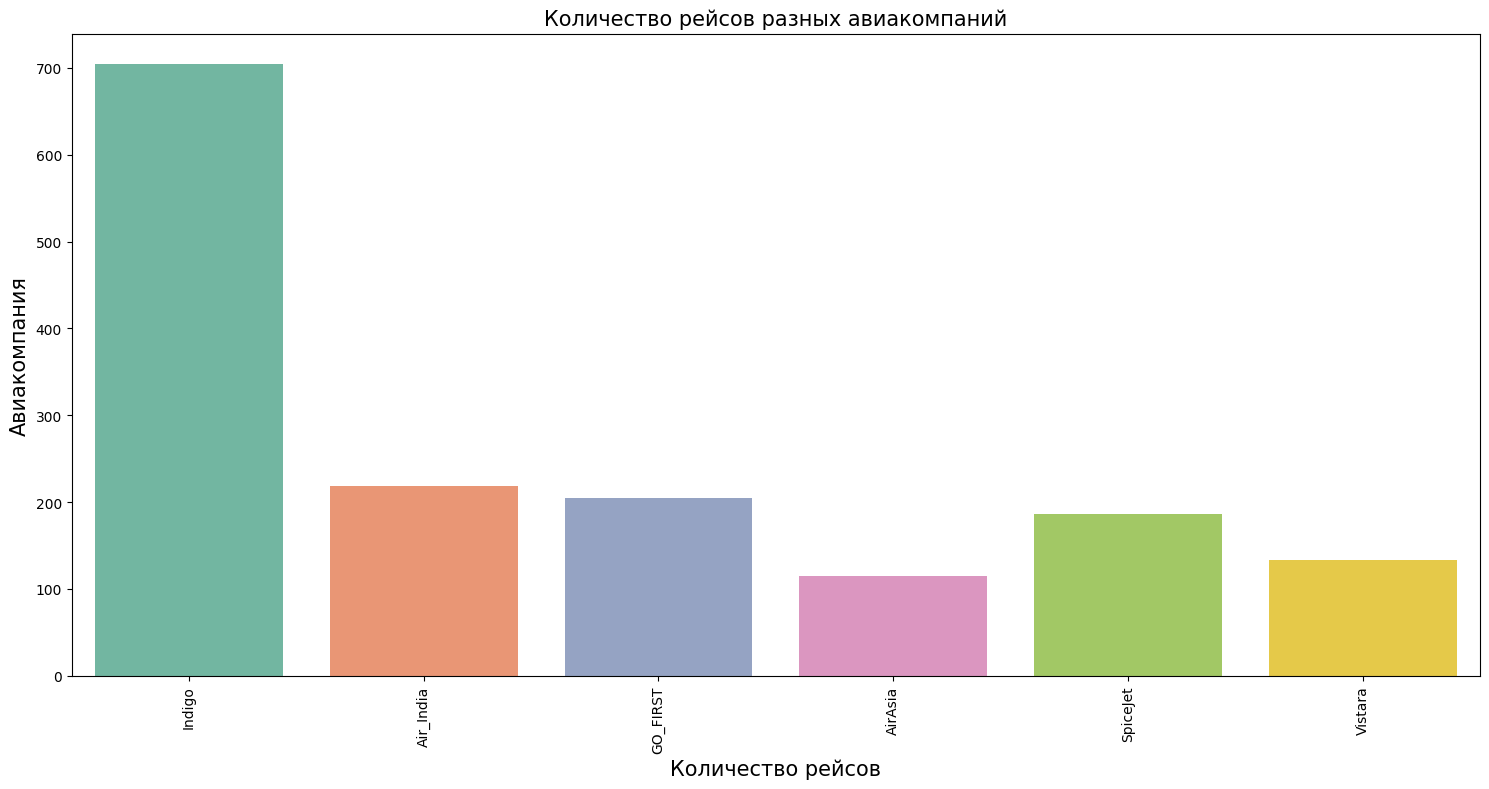

In [12]:
def plot_airline_flights(df, title, xlabel, ylabel, palette='Set2', figsize=(15, 8)):
    """
    Построение горизонтального графика количества рейсов разных авиакомпаний.

    :param df: DataFrame с данными
    :param title: Заголовок графика
    :param xlabel: Метка оси X
    :param ylabel: Метка оси Y
    :param palette: Палитра цветов (по умолчанию 'Set2')
    :param figsize: Размер фигуры (по умолчанию (15, 8))
    """
    plt.figure(figsize=figsize)
    sns.countplot(x=df['airline'], palette=palette)
    
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    
    # Поворачиваем метки оси X на 90 градусов для читаемости
    plt.xticks(rotation=90)
    
    plt.tight_layout()  # Обеспечиваем, чтобы метки поместились в график
    plt.show()

# Пример использования функции
plot_airline_flights(
    df1, 
    title='Количество рейсов разных авиакомпаний', 
    xlabel='Количество рейсов', 
    ylabel='Авиакомпания'
)


In [13]:
# Группируем DataFrame по столбцам 'flight', 'airline' и 'class', сохраняя их как столбцы в результате
# и считаем количество не-null значений в каждой группе для всех остальных столбцов
df2 = df.groupby(['flight', 'airline', 'class'], as_index=False).count()

# Считаем количество вхождений каждого уникального значения в столбце 'class' в df2
df2['class'].value_counts()


class
Economy     1560
Business     295
Name: count, dtype: int64

<b> Большинство авиакомпаний используют экономический класс как обычный

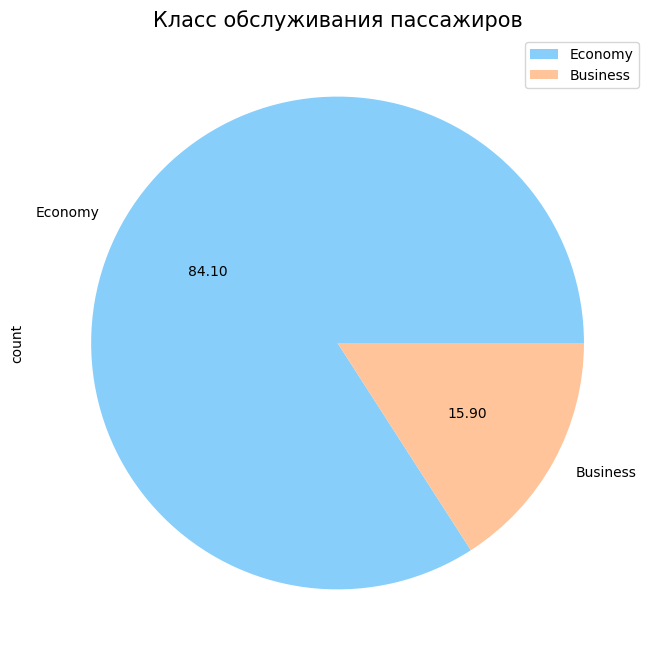

In [14]:
import matplotlib.pyplot as plt

def plot_class_distribution(class_counts, title, legend_labels=None, colors=None):
    """
    Построение круговой диаграммы распределения классов обслуживания.

    :param class_counts: Series с количеством каждого класса
    :param title: Заголовок графика
    :param legend_labels: Метки для легенды (по умолчанию None)
    :param colors: Список цветов (по умолчанию None)
    """
    # Создаём круговую диаграмму с пользовательскими цветами
    class_counts.plot(kind='pie', 
                      textprops={'color': 'black'}, 
                      autopct='%.2f', 
                      colors=colors)
    
    # Устанавливаем заголовок
    plt.title(title, fontsize=15)
    
    # Если переданы метки для легенды, добавляем их
    if legend_labels:
        plt.legend(legend_labels)
    
    plt.show()

# Пример использования функции с пользовательскими цветами
class_counts = df2['class'].value_counts()
colors = ['#87CEFA', '#FFC499', '#FFC499']  # HEX-коды цветов

plot_class_distribution(
    class_counts, 
    title='Класс обслуживания пассажиров', 
    legend_labels=['Economy', 'Business', 'First Class'],
    colors=colors
)


<b> Отличаются ли цены в зависимости от авиакомпании?</b>

<p>
 
<ul>
 <li>Как мы видим, Vistara имеет максимальный ценовой диапазон</li>
 <li>У авиакомпаний Vistara и Air_India максимальная цена по сравнению с другими</li>
 <li>У SpiceJet, AirAsia, GO_First и Indigo цены примерно такие же</li> 
 
</ul>
</p>

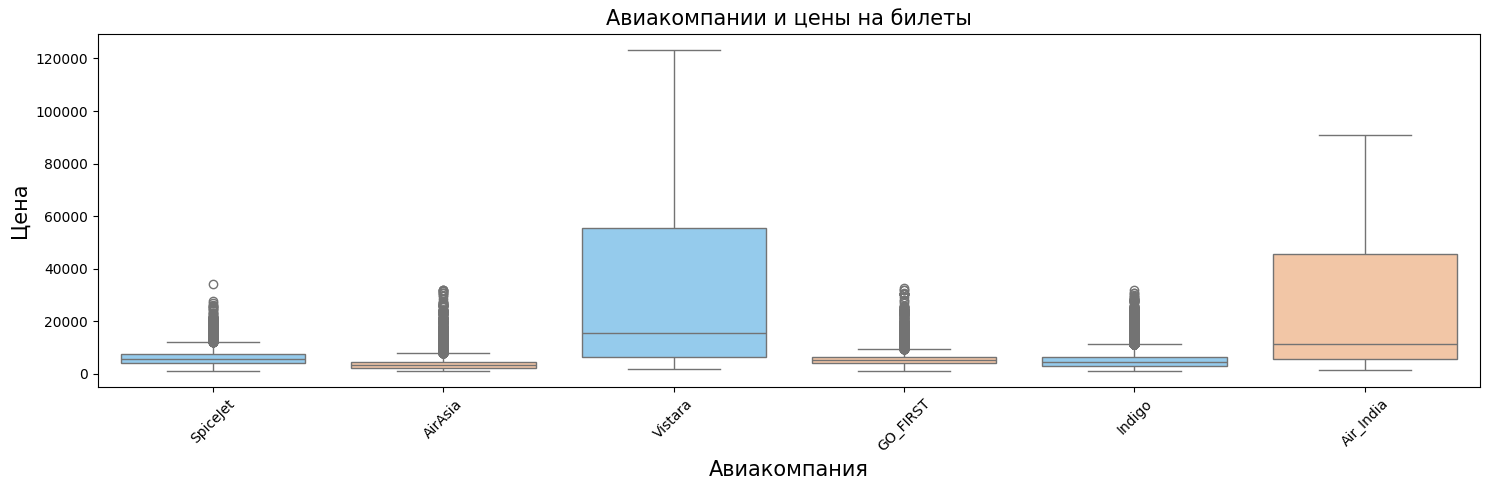

In [15]:
def plot_airline_price_boxplot(df, x_col, y_col, title, xlabel, ylabel, figsize=(15, 5), palette=None):
    """
    Создает боксплот для сравнения цен авиакомпаний.

    :param df: DataFrame с данными
    :param x_col: Название столбца для оси X (авиакомпании)
    :param y_col: Название столбца для оси Y (цены)
    :param title: Заголовок графика
    :param xlabel: Подпись оси X
    :param ylabel: Подпись оси Y
    :param figsize: Размер фигуры (ширина, высота)
    :param palette: Цветовая палитра (по умолчанию None)
    """
    plt.figure(figsize=figsize)
    
    # Используем спокойную цветовую палитру
    if palette is None:
        palette = sns.color_palette("pastel")
    
    sns.boxplot(x=df[x_col], y=df[y_col], palette=palette)
    
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    
    plt.xticks(rotation=45)  # Поворачиваем метки оси X для лучшей читаемости
    plt.tight_layout()  # Автоматически регулируем макет
    plt.show()

# Пример использования функции
plot_airline_price_boxplot(
    df, 
    x_col='airline', 
    y_col='price', 
    title='Авиакомпании и цены на билеты',
    xlabel='Авиакомпания',
    ylabel='Цена',
    figsize=(15, 5),
    palette=sns.color_palette(["#87CEFA", "#FFC499"])  # Светло-голубой и светло-оранжевый
)


<p>
 <b> Как различается стоимость билета в эконом и бизнес-классе?</b>
 
<ul> 
 <li>Стоимость билета является максимальной для бизнес-класса по сравнению с экономом</li>
</ul>
</p>

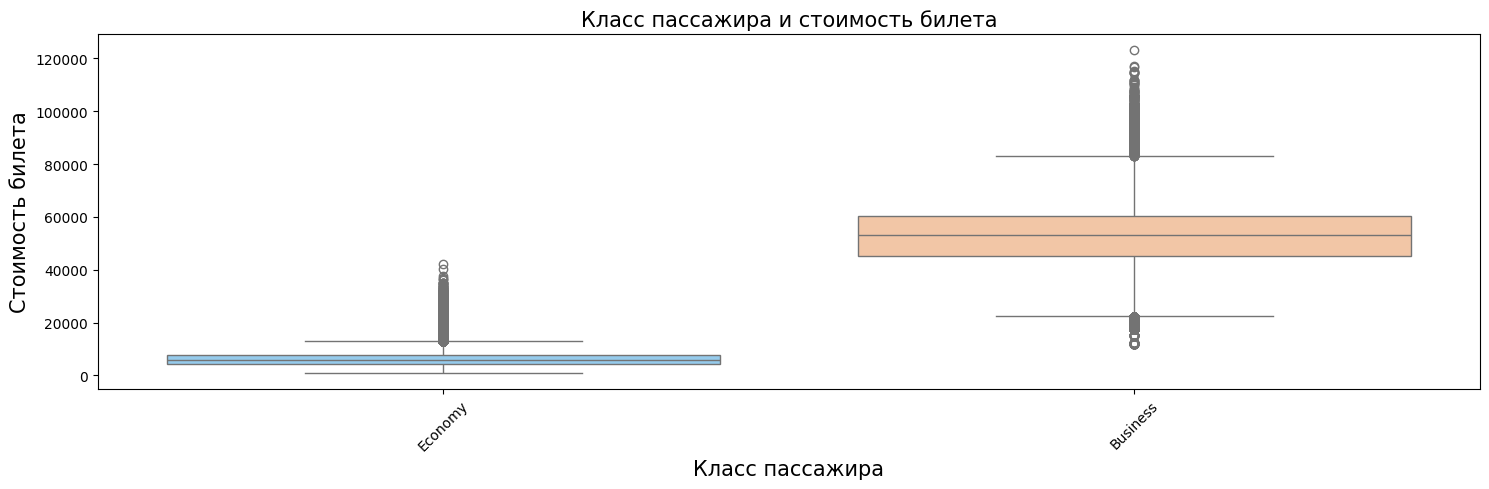

In [16]:
plot_airline_price_boxplot(
    df, 
    x_col='class', 
    y_col='price', 
    title='Класс пассажира и стоимость билета',
    xlabel='Класс пассажира',
    ylabel='Стоимость билета',
    figsize=(15, 5),
    palette=sns.color_palette(["#87CEFA", "#FFC499"])  # Светло-голубой и светло-оранжевый
)

<b> Как меняется стоимость билета в зависимости от количества пересадок на рейсе?</b>

<p> 
<ul><li>Максимальная цена билета на рейсы с одной пересадкой</li></ul>
</p>

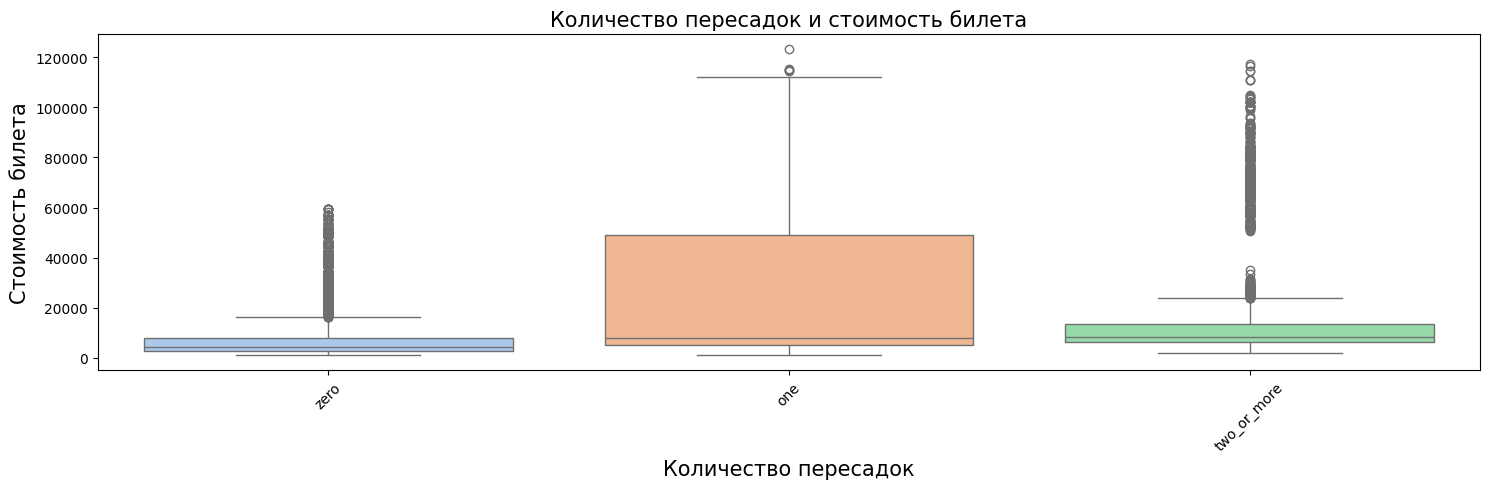

In [17]:
plot_airline_price_boxplot(
    df, 
    x_col='stops', 
    y_col='price', 
    title='Количество пересадок и стоимость билета',
    xlabel='Количество пересадок',
    ylabel='Стоимость билета',
    figsize=(15, 5),
)

<p>
 
<b> Как меняется цена билета в зависимости от времени вылета и прибытия?</b><br>

 
<b>1. Время отправления зависит от цены билета</b>

 <ul>
 <li> Стоимость билета выше для рейсов, вылетающих ночью</li>
 <li>Стоимость билета практически одинакова для рейсов, вылетающих ранним утром, утром и вечером</li>
 <li>Стоимость билета низкая для рейсов, время вылета которых - поздний час</li>
 </ul>
 
 
 
<b>2. Соотношение времени прибытия и цены билета</b>

 <ul>
 <li>Стоимость билета выше для рейсов с вечерним временем прибытия</li>
 <li>Стоимость билета практически одинакова для рейсов с утренним и вечерним временем прибытия</li>
 <li>Цена билета низкая на рейсы, время прибытия на которые совпадает с временем вылета поздно вечером</li>
 </ul>
 </p>

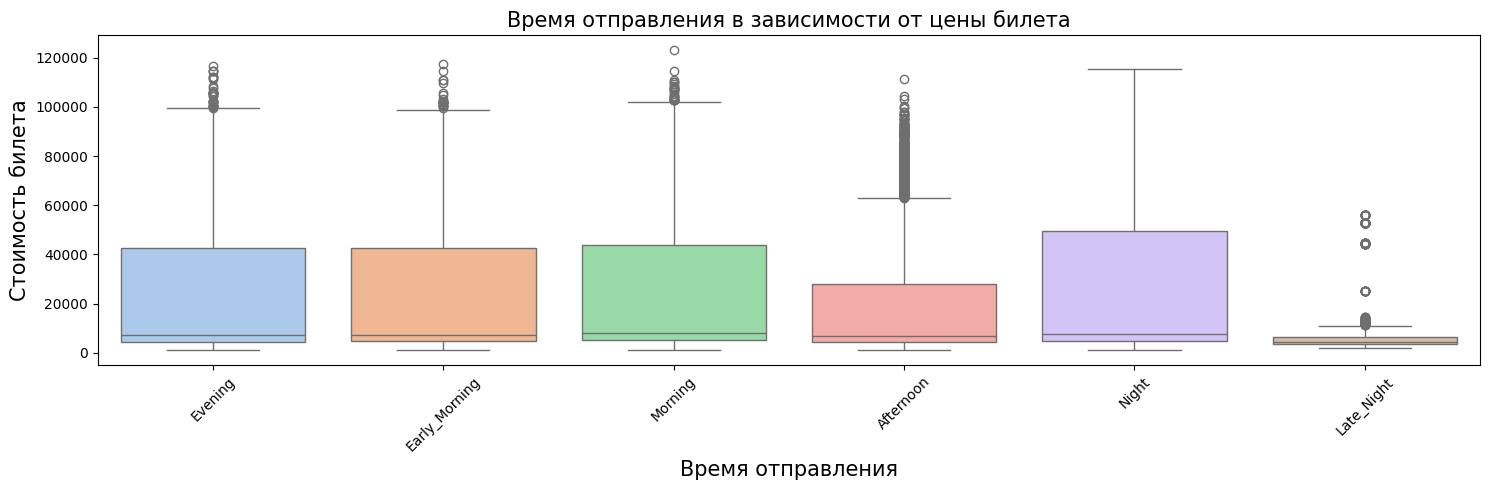

In [18]:
plot_airline_price_boxplot(
    df, 
    x_col='departure_time', 
    y_col='price', 
    title='Время отправления в зависимости от цены билета',
    xlabel='Время отправления',
    ylabel='Стоимость билета',
    figsize=(15, 5),
)


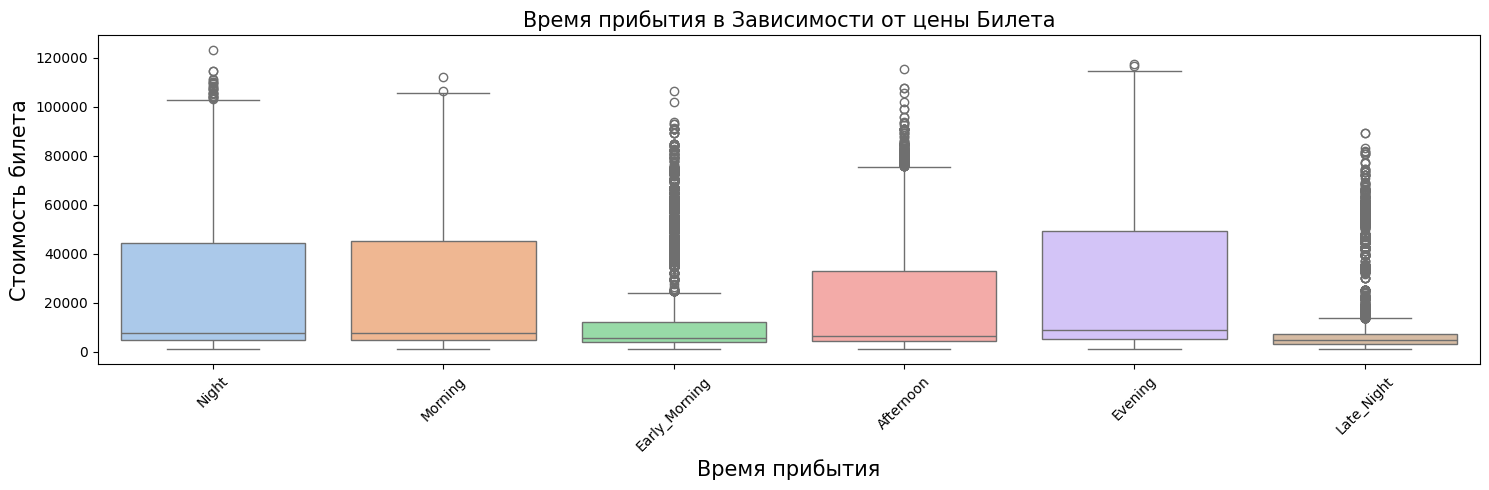

In [19]:
plot_airline_price_boxplot(
    df, 
    x_col='arrival_time', 
    y_col='price', 
    title='Время прибытия в Зависимости от цены Билета',
    xlabel='Время прибытия',
    ylabel='Стоимость билета',
    figsize=(15, 5),
)

<p>
<b> Как меняется цена в зависимости от города отправления и города назначения?</b><br>
 
<b>1. Город отправления и цена билета</b>

 <li> Стоимость билета выше на рейсы, отправляющиеся из Калькутты</li>
 <li>Стоимость билета практически одинакова на рейсы, отправляющиеся из таких городов, как Мумбаи и Ченнаи, Хайдарабад и Бангалор</li>
 <li> Цена билета низкая на рейсы, отправляющиеся из Дели</li>
 
 
<b>2. Город назначения зависит от цены билета</b>

 <li> Цена билета выше на рейсы, конечными городами которых являются Калькутта и Ченнаи</li>
 <li> Стоимость билета практически одинакова на рейсы из таких городов назначения, как Мумбаи и Бангалор</li>
 <li> Цена билета низкая на рейсы из такого города назначения, как Дели</li>
</p>

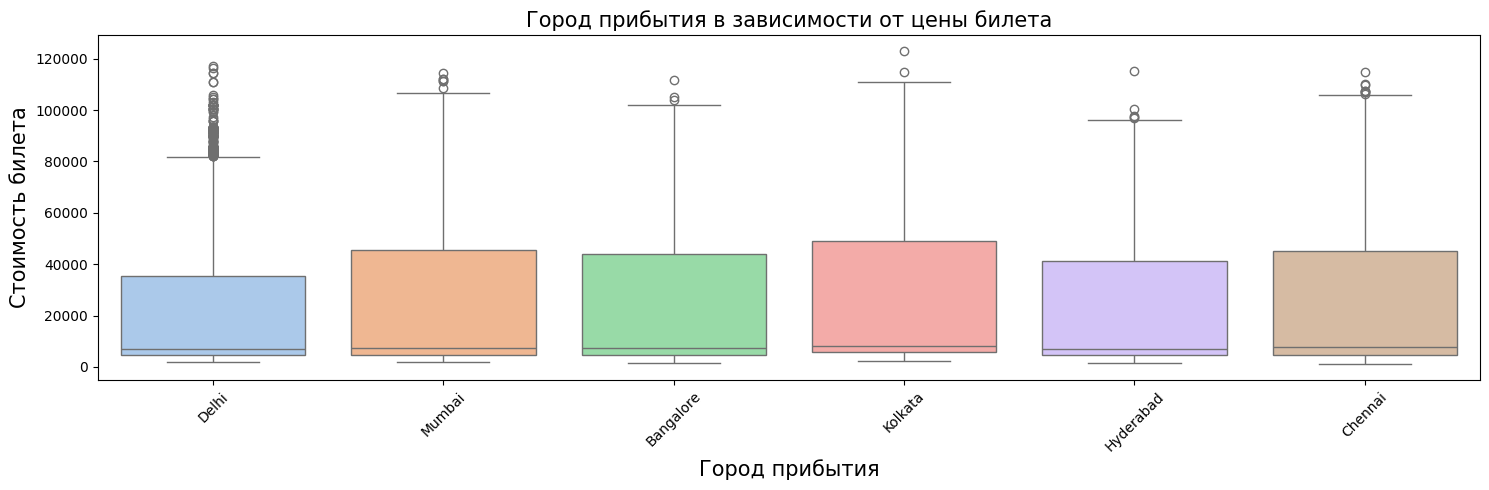

In [20]:
plot_airline_price_boxplot(
    df, 
    x_col='source_city', 
    y_col='price', 
    title='Город прибытия в зависимости от цены билета',
    xlabel='Город прибытия',
    ylabel='Стоимость билета',
    figsize=(15, 5),
)

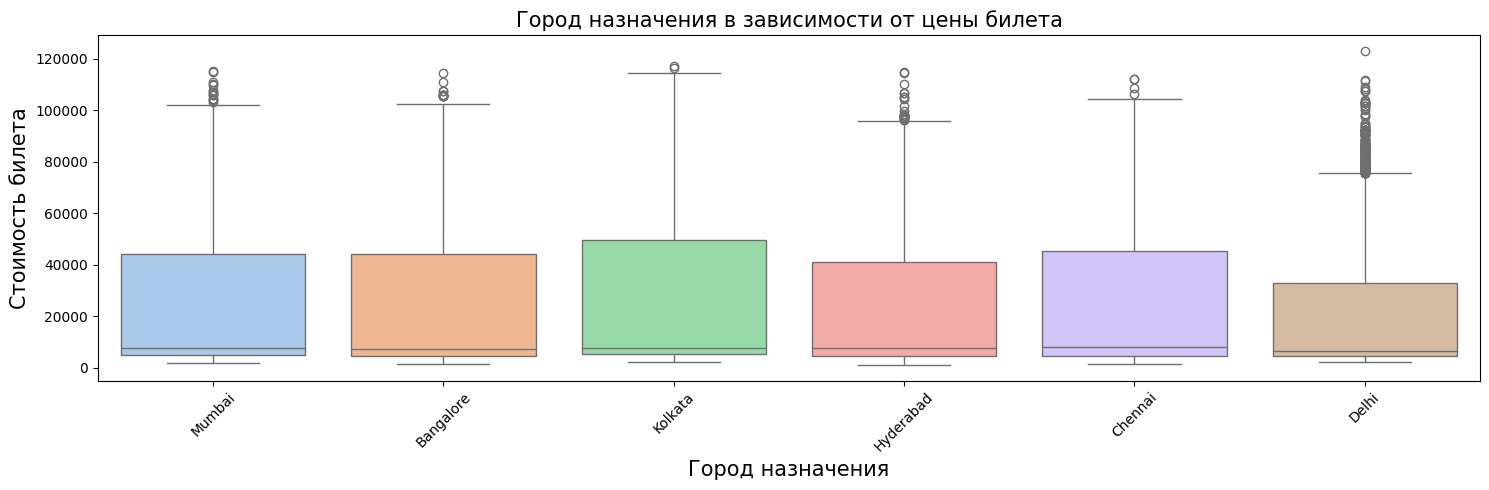

In [21]:
plot_airline_price_boxplot(
    df, 
    x_col='destination_city', 
    y_col='price', 
    title='Город назначения в зависимости от цены билета',
    xlabel='Город назначения',
    ylabel='Стоимость билета',
    figsize=(15, 5),
)

<p>
 <b> Как меняется цена в зависимости от продолжительности полета в зависимости от класса?</b>

<li> С увеличением продолжительности полета стоимость билета также увеличивается как в экономическом, так и в бизнес-классах</li>
</p>

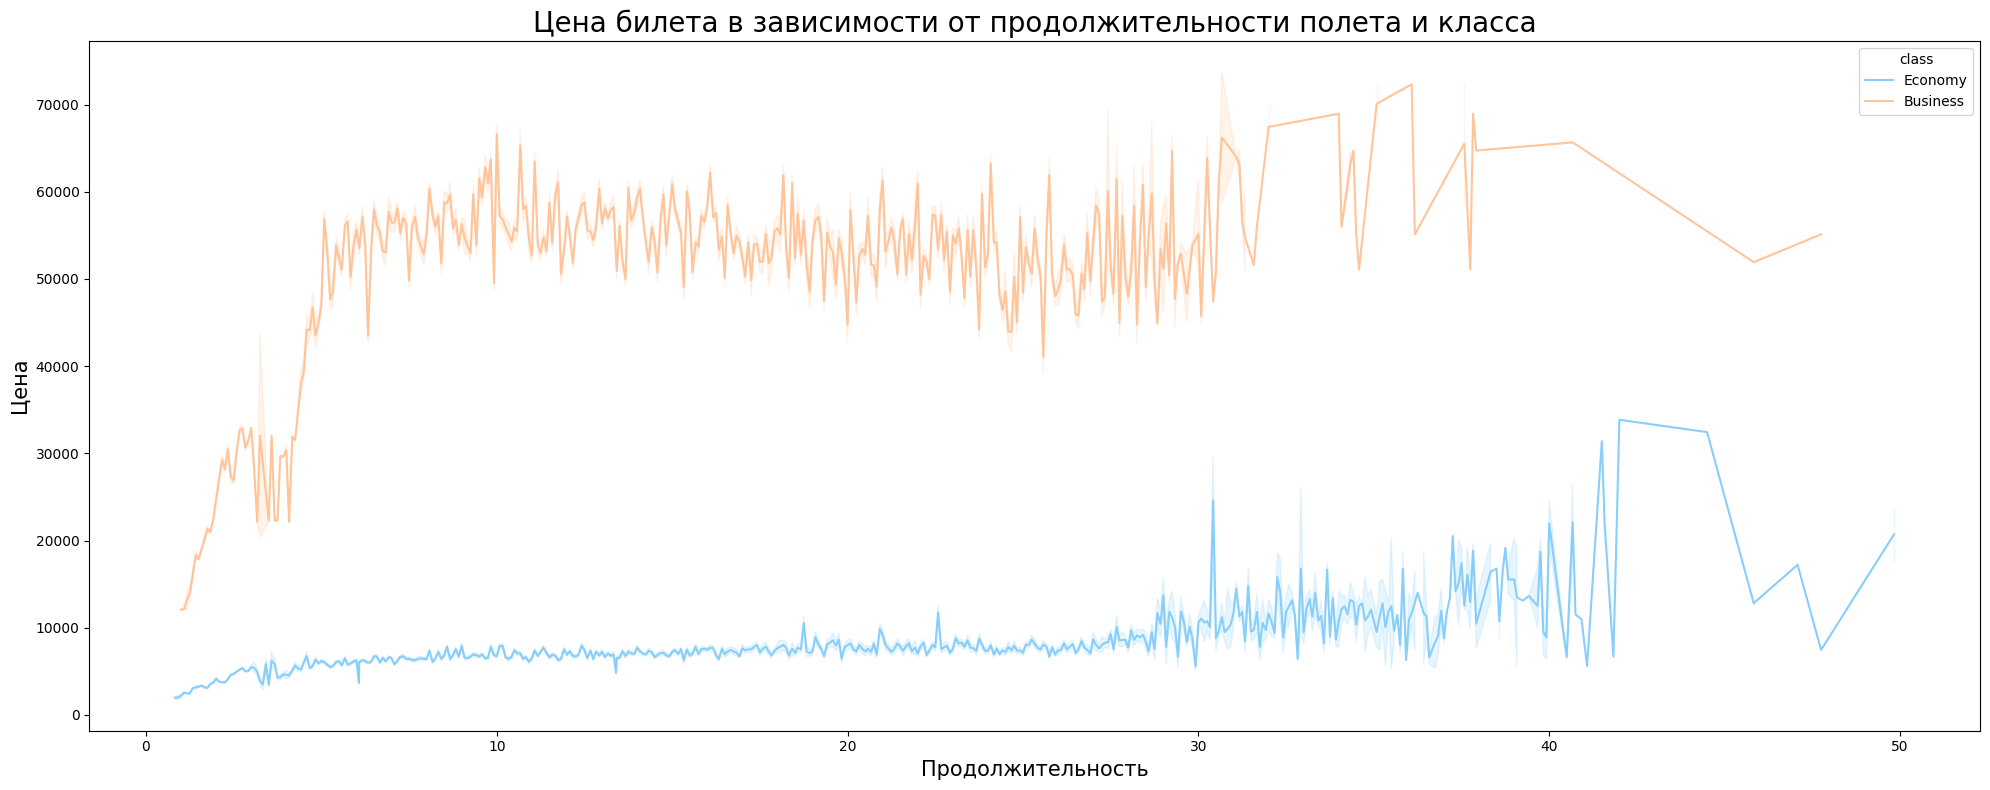

In [22]:
def plot_price_duration_lineplot(df, x_col, y_col, hue_col, title, xlabel, ylabel, figsize=(20, 8), palette=None):
    """
    Создает линейный график для сравнения цен билетов в зависимости от продолжительности полета и класса.

    :param df: DataFrame с данными
    :param x_col: Название столбца для оси X (продолжительность)
    :param y_col: Название столбца для оси Y (цена)
    :param hue_col: Название столбца для цвета (класс)
    :param title: Заголовок графика
    :param xlabel: Подпись оси X
    :param ylabel: Подпись оси Y
    :param figsize: Размер фигуры (ширина, высота)
    :param palette: Цветовая палитра (по умолчанию None)
    """
    # Устанавливаем светлую тему
    
    plt.figure(figsize=figsize)
    
    # Используем спокойную цветовую палитру
    if palette is None:
        palette = sns.color_palette("pastel")
    
    sns.lineplot(data=df, x=x_col, y=y_col, hue=hue_col, palette=palette)
    
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    
    plt.tight_layout()  # Автоматически регулируем макет
    plt.show()

# Пример использования функции
plot_price_duration_lineplot(
    df, 
    x_col='duration', 
    y_col='price', 
    hue_col='class', 
    title='Цена билета в зависимости от продолжительности полета и класса',
    xlabel='Продолжительность',
    ylabel='Цена',
    figsize=(20, 8),
    palette=sns.color_palette(["#87CEFA", "#FFC499"])  # Светло-голубой и светло-оранжевый
)


<p>
 <b> Как влияет на цену количество дней, оставшихся до вылета?</b>
 
<li> Как мы видим, по сравнению с другими авиакомпаниями, когда до вылета остается два дня, стоимость билета у всех авиакомпаний очень высока</li>
 
</p>

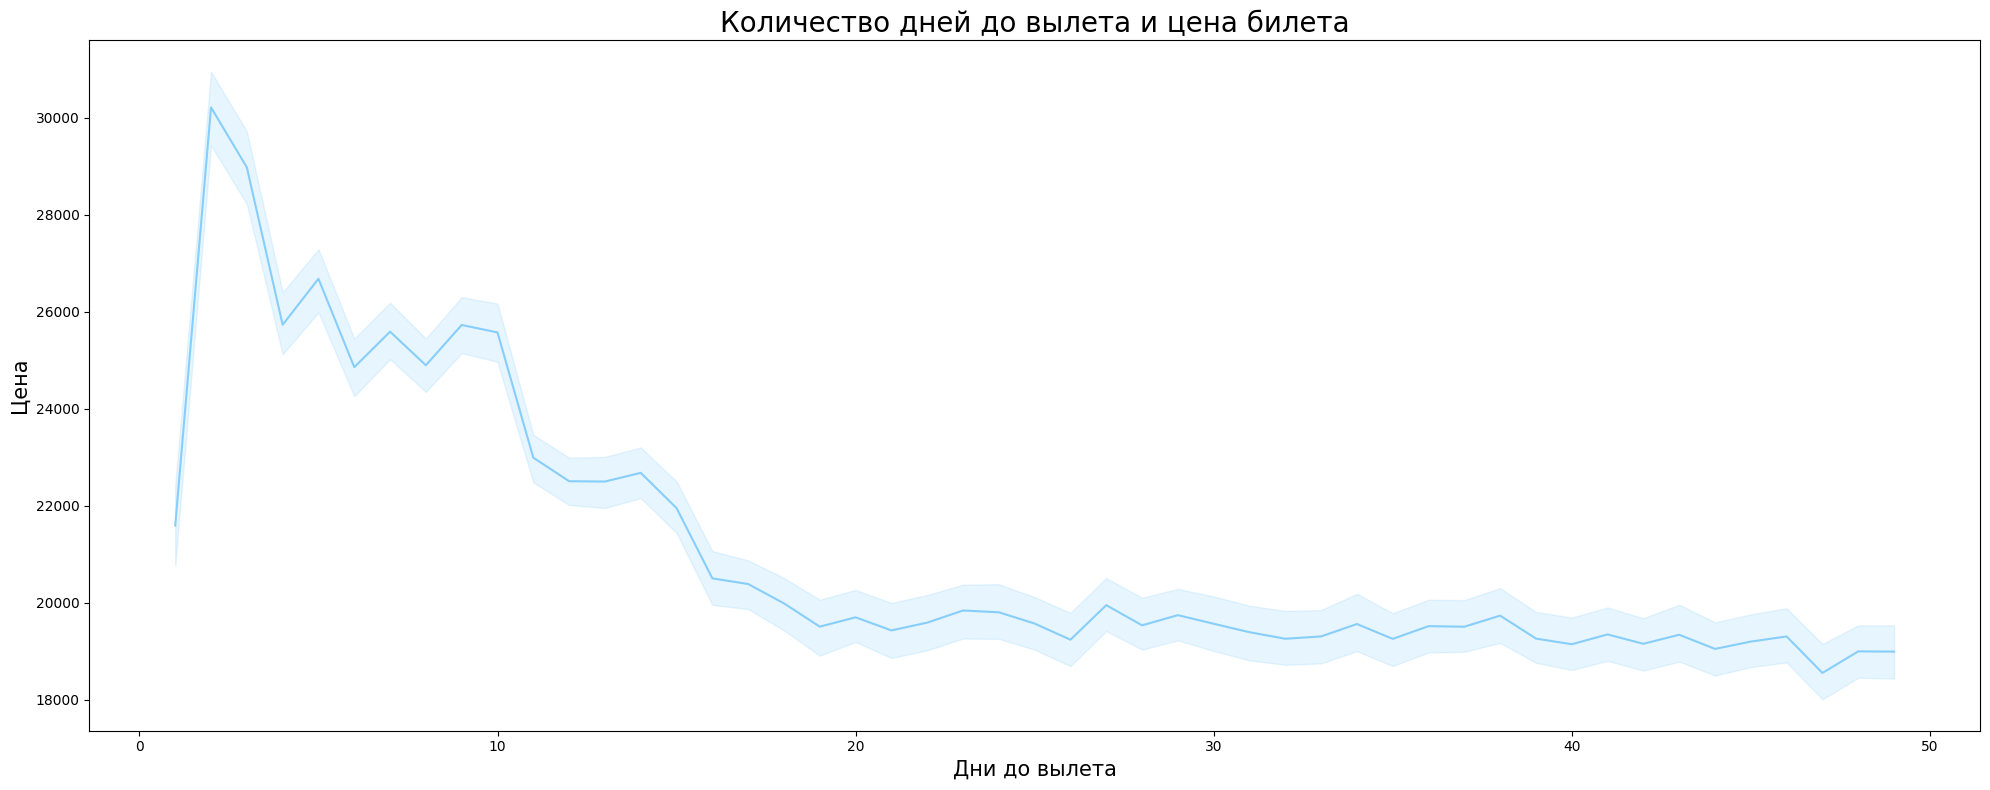

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_days_left_price_lineplot(df, x_col, y_col, title, xlabel, ylabel, figsize=(20, 8), color='blue'):
    """
    Создает линейный график для сравнения цен билетов в зависимости от количества дней до вылета.

    :param df: DataFrame с данными
    :param x_col: Название столбца для оси X (дни до вылета)
    :param y_col: Название столбца для оси Y (цена)
    :param title: Заголовок графика
    :param xlabel: Подпись оси X
    :param ylabel: Подпись оси Y
    :param figsize: Размер фигуры (ширина, высота)
    :param color: Цвет линии (по умолчанию 'blue')
    """
    plt.figure(figsize=figsize)
    
    sns.lineplot(data=df, x=x_col, y=y_col, color=color)
    
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    
    plt.tight_layout()  # Автоматически регулируем макет
    plt.show()

# Пример использования функции
plot_days_left_price_lineplot(
    df, 
    x_col='days_left', 
    y_col='price', 
    title='Количество дней до вылета и цена билета',
    xlabel='Дни до вылета',
    ylabel='Цена',
    color='#87CEFA'  # Светло-голубой цвет
)


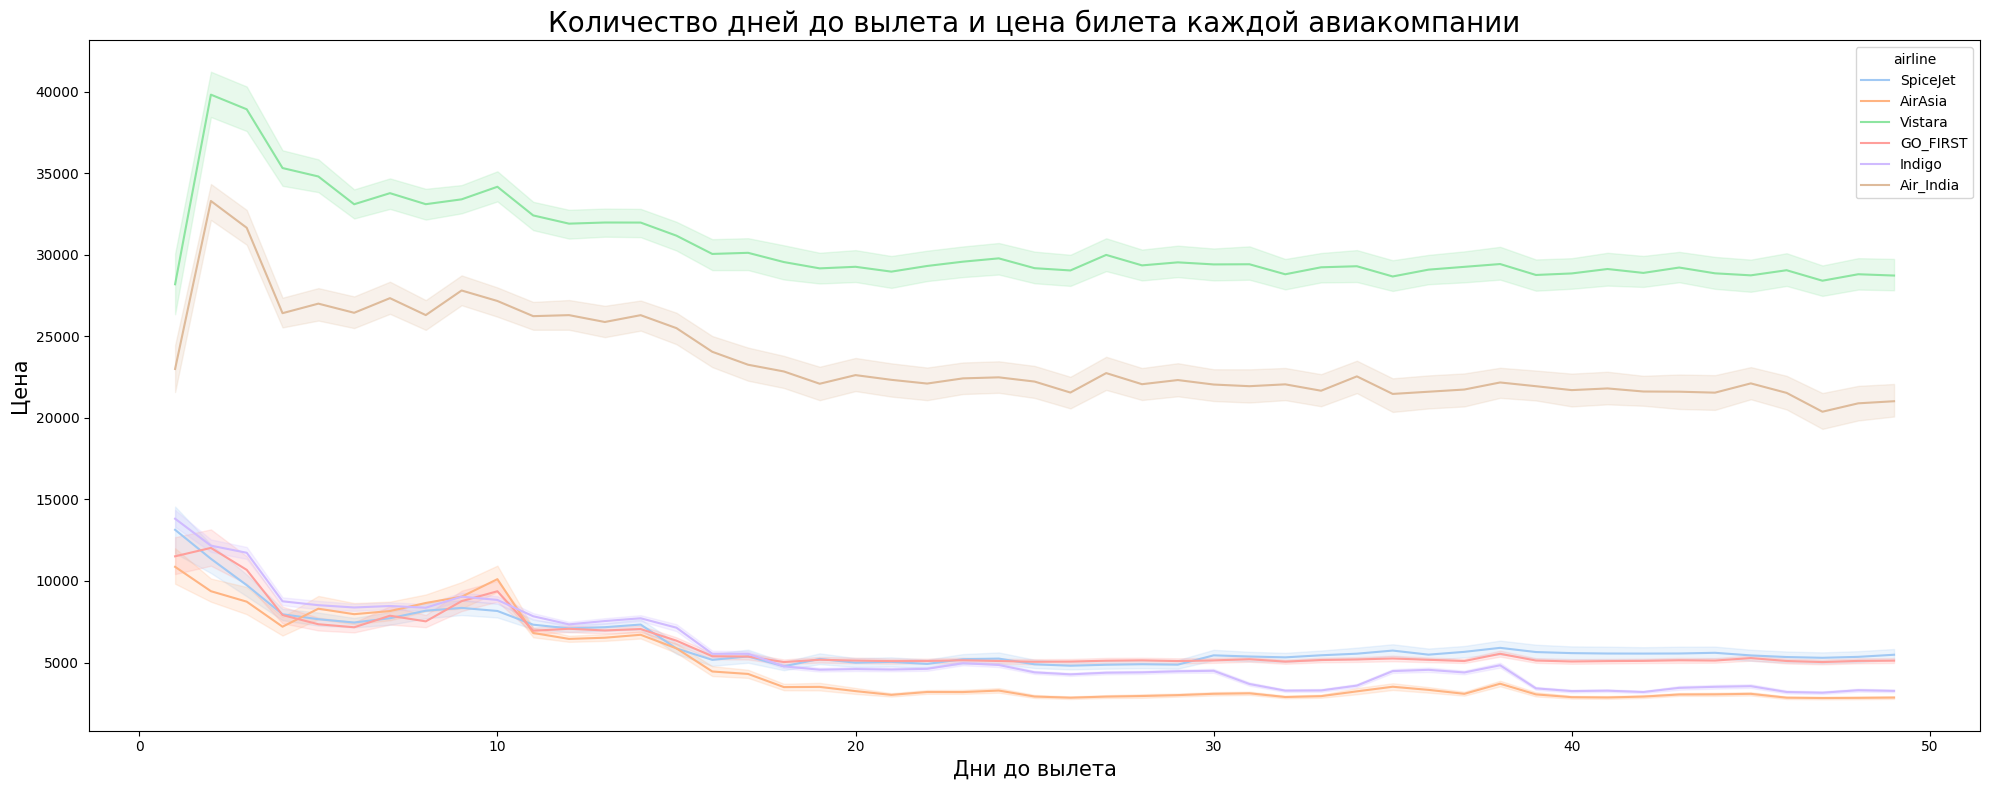

In [25]:
plot_price_duration_lineplot(
    df, 
    x_col='days_left', 
    y_col='price', 
    hue_col='airline', 
    title='Количество дней до вылета и цена билета каждой авиакомпании',
    xlabel='Дни до вылета',
    ylabel='Цена',
    figsize=(20, 8)
)


<b> Total number of Flights from one city to another</b>

In [32]:
df.groupby(
    ['flight','source_city','destination_city','airline','class']
    ,as_index=False
).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().sort_values(ascending=False, by='flight').head(10)

,source_city,destination_city,flight
14,Delhi,Mumbai,364
10,Delhi,Bangalore,310
13,Delhi,Kolkata,306
27,Mumbai,Delhi,282
11,Delhi,Chennai,258
29,Mumbai,Kolkata,240
25,Mumbai,Bangalore,228
1,Bangalore,Delhi,227
12,Delhi,Hyderabad,224
22,Kolkata,Delhi,185


<b> Общее количество рейсов из одного города в другой</b>

In [34]:
# Группируем DataFrame по столбцам 'airline', 'source_city' и 'destination_city', сохраняя их как столбцы в результате
# и вычисляем среднюю цену для каждой группы
df_grouped = df.groupby(['airline', 'source_city', 'destination_city'], as_index=False)['price'].mean().sort_values(ascending=False, by='price')

# Выводим первые 10 строк результата
df_grouped.head(10)


,airline,source_city,destination_city,price
150,Vistara,Bangalore,Kolkata,35746.714874
160,Vistara,Delhi,Kolkata,35702.441732
176,Vistara,Mumbai,Kolkata,35223.862417
172,Vistara,Mumbai,Bangalore,35029.880315
151,Vistara,Bangalore,Mumbai,34961.383271
169,Vistara,Kolkata,Delhi,33792.181332
167,Vistara,Kolkata,Bangalore,33501.412807
171,Vistara,Kolkata,Mumbai,33416.101911
156,Vistara,Chennai,Mumbai,32662.127337
173,Vistara,Mumbai,Chennai,32181.946251


In [35]:
# Создание резервной копии файла
df_bk=df.copy()

In [36]:
# Преобразование меток в числовую форму с помощью Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [59]:

# # Предположим, что df - это ваш DataFrame

# # Применение get_dummies к категориальным столбцам
# df_dummies = pd.get_dummies(df, drop_first=True, columns=[col for col in df.columns if df[col].dtype == 'object'])

# # Теперь df_dummies содержит преобразованные данные


In [37]:
# сохранение зависимых переменных в X и независимой переменной в Y
x=df.drop(['price'],axis=1)
y=df['price']

In [38]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [39]:
# Разделение данных на обучающий набор и тестовый набор
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [40]:
# Масштабирование значений для преобразования значений int в машинные языки
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [41]:
# Создаём словарь для хранения результатов моделей
# Каждый ключ соответствует метрике оценки модели
a = {
    'Model Name': [],  # Название модели
    'Mean_Absolute_Error_MAE': [],  # Средняя абсолютная ошибка
    'Adj_R_Square': [],  # Коэффициент детерминации с поправкой на количество переменных
    'Root_Mean_Squared_Error_RMSE': [],  # Среднеквадратическая ошибка
    'Mean_Absolute_Percentage_Error_MAPE': [],  # Средняя абсолютная процентная ошибка
    'Mean_Squared_Error_MSE': [],  # Средняя квадратическая ошибка
    'Root_Mean_Squared_Log_Error_RMSLE': [],  # Среднеквадратическая логарифмическая ошибка
    'R2_score': []  # Коэффициент детерминации
}

# Преобразуем словарь в DataFrame для удобного отображения и анализа данных
Results = pd.DataFrame(a)

# Выводим первые строки DataFrame для быстрого просмотра
Results.head()


,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import time
import pandas as pd

# Функция для создания моделей регрессии
def create_models():
    """
    Создаёт объекты моделей регрессии с настройками по умолчанию.
    """
    modelmlg = LinearRegression()  # Линейная регрессия
    modeldcr = DecisionTreeRegressor()  # Дерево решений
    # modelSVR = SVR()  # Машинка опорных векторов, самая медленная
    modelKNN = KNeighborsRegressor(n_neighbors=5)  # Ближайшие соседи
    modelRE = Ridge()  # Регуляризация Ridge
    modelLO = Lasso(alpha=0.1)  # Регуляризация Lasso
    modelElNet = ElasticNet()  # Регуляризация Elastic Net
    
    return [modelmlg, modeldcr, modelKNN, modelRE, modelLO, modelElNet]

# Функция для оценки модели
def evaluate_model(model, x_train, y_train, x_test, y_test):
    """
    Обучает модель на тренировочных данных, делает прогноз на тестовых данных и вычисляет метрики качества.
    
    :param model: Объект модели
    :param x_train: Тренировочные данные (признаки)
    :param y_train: Тренировочные данные (целевая переменная)
    :param x_test: Тестовые данные (признаки)
    :param y_test: Тестовые данные (целевая переменная)
    """
    start_time = time.time()  # Фиксируем время начала
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    end_time = time.time()  # Фиксируем время окончания
    execution_time = end_time - start_time  # Вычисляем время выполнения
    
    # Метрики качества
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    
    # Расчет MAPE
    def mape(y_test, y_pred):
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    mape_value = mape(y_test, y_pred)
    
    # Расчет Adjusted R2
    r_squared = r2
    adjusted_r_squared = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
    
    # Расчет RMSLE
    rmsle = np.log(np.sqrt(mse))
    
    print(f"Модель: {model}")
    print(f"Время выполнения: {execution_time:.2f} секунд")
    print(f"MAE: {round(mae, 3)}")
    print(f"MSE: {round(mse, 3)}")
    print(f"RMSE: {round(rmse, 3)}")
    print(f"R2_score: {round(r2, 6)}")
    print(f"MAPE: {round(mape_value, 2)}%")
    print(f"Adjusted R2: {round(adjusted_r_squared, 6)}")
    print(f"RMSLE: {round(rmsle, 3)}")
    print('------------------------------------------------------------------------------------------------------------')
    
    return {
        'Model Name': str(model),  # Преобразуем в строку для корректного сохранения в CSV
        'Execution Time': execution_time,
        'Mean_Absolute_Error_MAE': mae,
        'Adj_R_Square': adjusted_r_squared,
        'Root_Mean_Squared_Error_RMSE': rmse,
        'Mean_Absolute_Percentage_Error_MAPE': mape_value,
        'Mean_Squared_Error_MSE': mse,
        'Root_Mean_Squared_Log_Error_RMSLE': rmsle,
        'R2_score': r2
    }

# Основная часть программы
if __name__ == "__main__":
    models = create_models()
    results = []
    
    for model in models:
        result = evaluate_model(model, x_train, y_train, x_test, y_test)
        results.append(result)
    
    # Создание DataFrame из результатов
    Results = pd.DataFrame(results)
    print(Results)
    
    # Сохранение результатов в CSV-файл
    Results.to_csv('model_results.csv', index=False)
    print("Результаты сохранены в файл model_results.csv")


Модель: LinearRegression()
Время выполнения: 0.36 секунд
MAE: 4630.296
MSE: 49070241.265
RMSE: 7005.015
R2_score: 0.904656
MAPE: 43.89%
Adjusted R2: 0.904646
RMSLE: 8.854
------------------------------------------------------------------------------------------------------------
Модель: DecisionTreeRegressor()
Время выполнения: 2.49 секунд
MAE: 1257.122
MSE: 13695207.33
RMSE: 3700.704
R2_score: 0.97339
MAPE: 8.61%
Adjusted R2: 0.973387
RMSLE: 8.216
------------------------------------------------------------------------------------------------------------
Модель: KNeighborsRegressor()
Время выполнения: 26.90 секунд
MAE: 1854.47
MSE: 14592966.689
RMSE: 3820.074
R2_score: 0.971646
MAPE: 11.11%
Adjusted R2: 0.971643
RMSLE: 8.248
------------------------------------------------------------------------------------------------------------
Модель: Ridge()
Время выполнения: 0.05 секунд
MAE: 4630.313
MSE: 49070187.277
RMSE: 7005.012
R2_score: 0.904656
MAPE: 43.89%
Adjusted R2: 0.904646
RMSLE: 8

In [43]:
Results

,Model Name,Execution Time,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),0.357500,4630.295614,0.904646,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
1,DecisionTreeRegressor(),2.493461,1257.122371,0.973387,3700.703626,8.610425,1.369521e+07,8.216278,0.973390
2,KNeighborsRegressor(),26.903817,1854.469527,0.971643,3820.074173,11.113824,1.459297e+07,8.248025,0.971646
3,Ridge(),0.051373,4630.313301,0.904646,7005.011583,43.888754,4.907019e+07,8.854381,0.904656
4,Lasso(alpha=0.1),7.649526,4630.179207,0.904646,7005.006183,43.885459,4.907011e+07,8.854380,0.904656
5,ElasticNet(),1.354720,13795.560428,0.479817,16361.269867,165.497575,2.676912e+08,9.702672,0.479875


In [45]:
models=['LinearRegression','DecisionTreeRegressor','KNeighborsRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,DecisionTreeRegressor,0.973387,1257.122371,3700.703626,8.610425,1.369521e+07,8.216278,0.973390
1,KNeighborsRegressor,0.971643,1854.469527,3820.074173,11.113824,1.459297e+07,8.248025,0.971646
2,Lasso Regression,0.904646,4630.179207,7005.006183,43.885459,4.907011e+07,8.854380,0.904656
3,Ridge Regression,0.904646,4630.313301,7005.011583,43.888754,4.907019e+07,8.854381,0.904656
4,LinearRegression,0.904646,4630.295614,7005.015436,43.888567,4.907024e+07,8.854382,0.904656


<p> Из приведенных выше результатов следует, что Топ-3 моделей по сравнению с ошибками , значениями Adj_R_Square и R2_Score составляют<br>
 
1. <b>DecisionTreeRegressor</b>
2. <b>KNeighborsRegressor</b>
3. <b>LinearRegression</b>

<p>Обработка данных с помощью <b>DecisionTreeRegressor</b></p>
</p>

In [47]:
modeldcr = DecisionTreeRegressor()
#Тренируем модель с помощью
modeldcr.fit(x_train, y_train)
    
# Спрогнозируем модель с помощью тестовых данных

y_pred = modeldcr.predict(x_test)

In [48]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [49]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
98261,Vistara,UK-810,Bangalore,Early_Morning,one,Afternoon,Mumbai,Economy,8.00,25,6568,6568,6568.0
26879,Air_India,AI-895,Delhi,Morning,one,Evening,Kolkata,Economy,7.50,39,5820,5820,5820.0
162447,GO_FIRST,G8-7556,Hyderabad,Afternoon,one,Night,Mumbai,Economy,7.75,29,4165,4165,4165.0
107307,Vistara,UK-818,Bangalore,Evening,one,Evening,Kolkata,Economy,22.42,33,8112,8112,8112.0
17181,Vistara,UK-993,Delhi,Afternoon,one,Night,Bangalore,Economy,8.08,36,4496,4496,4496.0
207127,Vistara,UK-859,Delhi,Morning,one,Night,Mumbai,Business,12.58,6,41281,41281,41281.0
2129,AirAsia,I5-721,Delhi,Night,one,Early_Morning,Mumbai,Economy,10.50,13,5949,5949,5949.0
205230,Vistara,UK-836,Chennai,Morning,one,Evening,Hyderabad,Economy,6.25,33,4086,4086,4086.0
251315,Air_India,AI-503,Bangalore,Evening,one,Morning,Mumbai,Business,15.25,32,54684,54684,54684.0
219454,Air_India,AI-560,Delhi,Morning,zero,Morning,Hyderabad,Business,2.33,8,23944,23944,23944.0


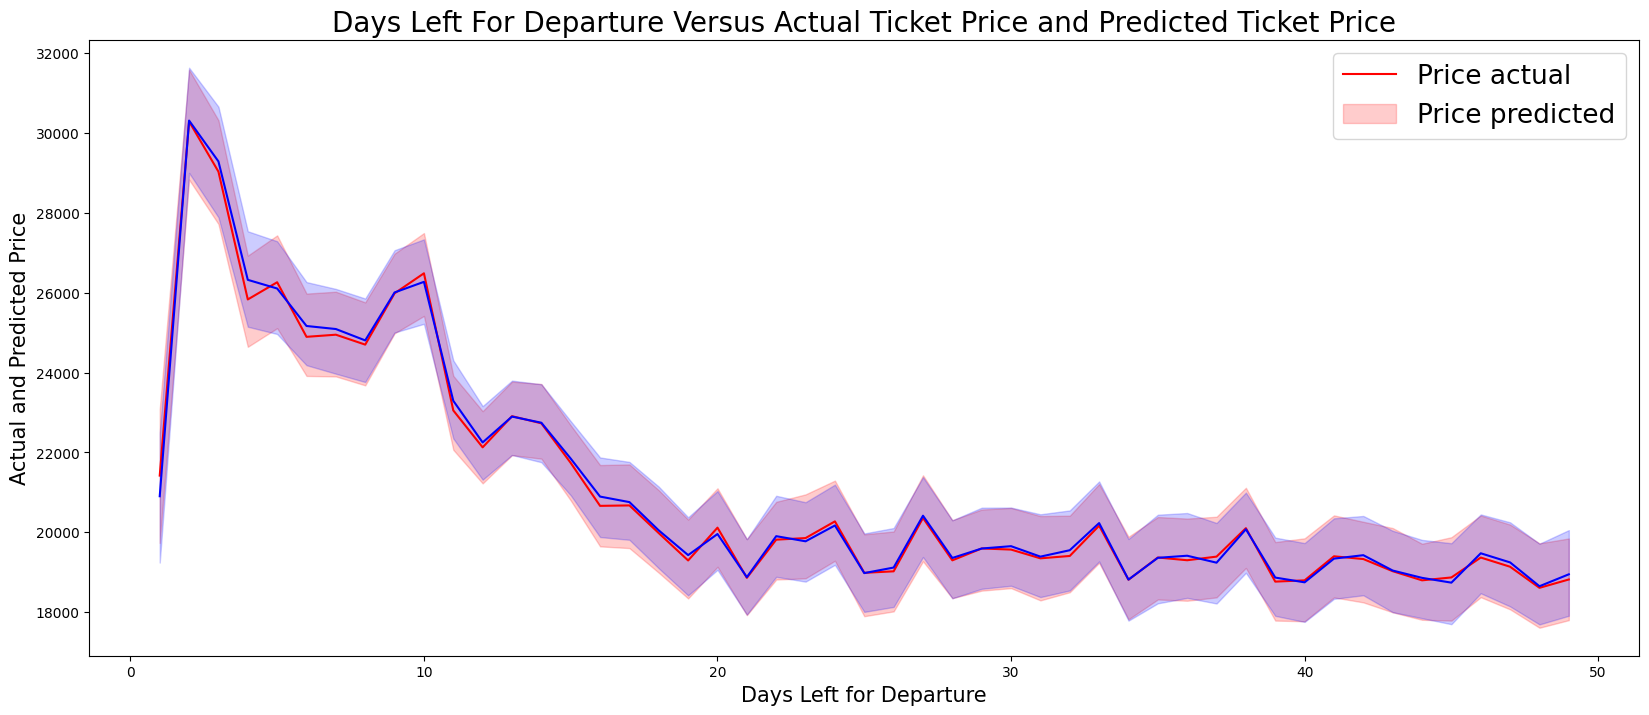

In [50]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

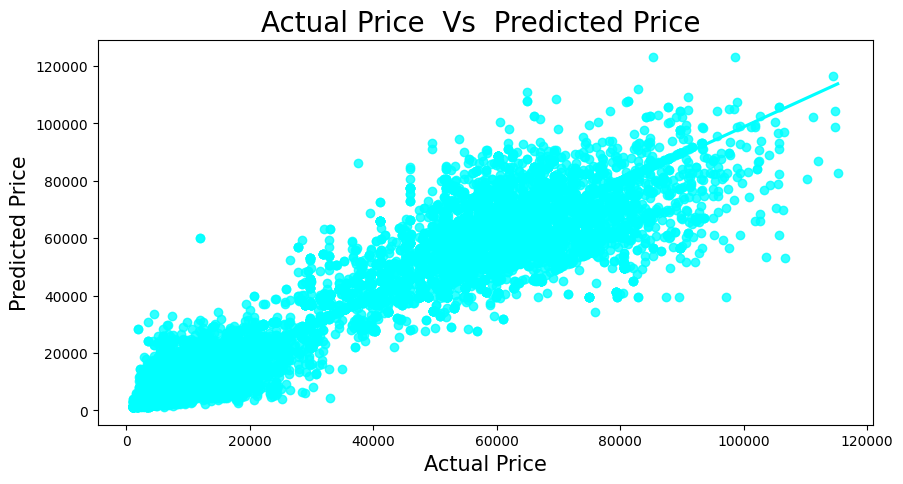

In [51]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [52]:
modeldcr.feature_importances_

array([7.61610385e-04, 2.98732214e-02, 5.92658031e-03, 2.69081935e-03,
       2.39738554e-03, 2.61873091e-03, 9.69643472e-03, 8.79412372e-01,
       4.86881941e-02, 1.79346513e-02])

In [55]:
x_train.to_numpy()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.971795,0.4,1.0,0.0,0.8,1.0,1.0,0.256939,0.270833
1,1.0,0.973077,0.6,0.8,0.0,0.4,0.4,0.0,0.178571,0.458333
2,1.0,0.952564,0.2,0.2,0.0,0.4,0.8,0.0,0.211020,0.583333
3,1.0,0.991026,0.4,0.4,0.0,1.0,0.0,1.0,0.086735,0.312500
4,0.4,0.719231,0.0,0.8,0.0,1.0,0.4,1.0,0.239796,0.916667
...,...,...,...,...,...,...,...,...,...,...
210102,1.0,0.934615,0.8,0.4,0.0,0.0,0.4,1.0,0.401429,0.020833
210103,1.0,0.969872,0.0,1.0,0.0,1.0,0.2,0.0,0.501837,0.125000
210104,0.2,0.542308,0.8,1.0,0.0,0.8,1.0,1.0,0.262041,0.583333
210105,0.4,0.592308,0.8,0.0,0.0,1.0,0.6,1.0,0.153061,0.791667


In [56]:
pd.DataFrame(
    {"feature": x.columns, "importance": modeldcr.feature_importances_}
).sort_values(by="importance", ascending=False).reset_index(drop=True)

,feature,importance
0,class,0.879412
1,duration,0.048688
2,flight,0.029873
3,days_left,0.017935
4,destination_city,0.009696
5,source_city,0.005927
6,departure_time,0.002691
7,arrival_time,0.002619
8,stops,0.002397
9,airline,0.000762


In [ ]:
DecisionTreeRegressor?

In [58]:
# Создание дерева регрессии с максимальной глубиной 5
modeldcr = DecisionTreeRegressor(max_depth=5, random_state=42)

#Тренируем модель с помощью
modeldcr.fit(x_train, y_train)
    
# Спрогнозируем модель с помощью тестовых данных

y_pred = modeldcr.predict(x_test)

In [59]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

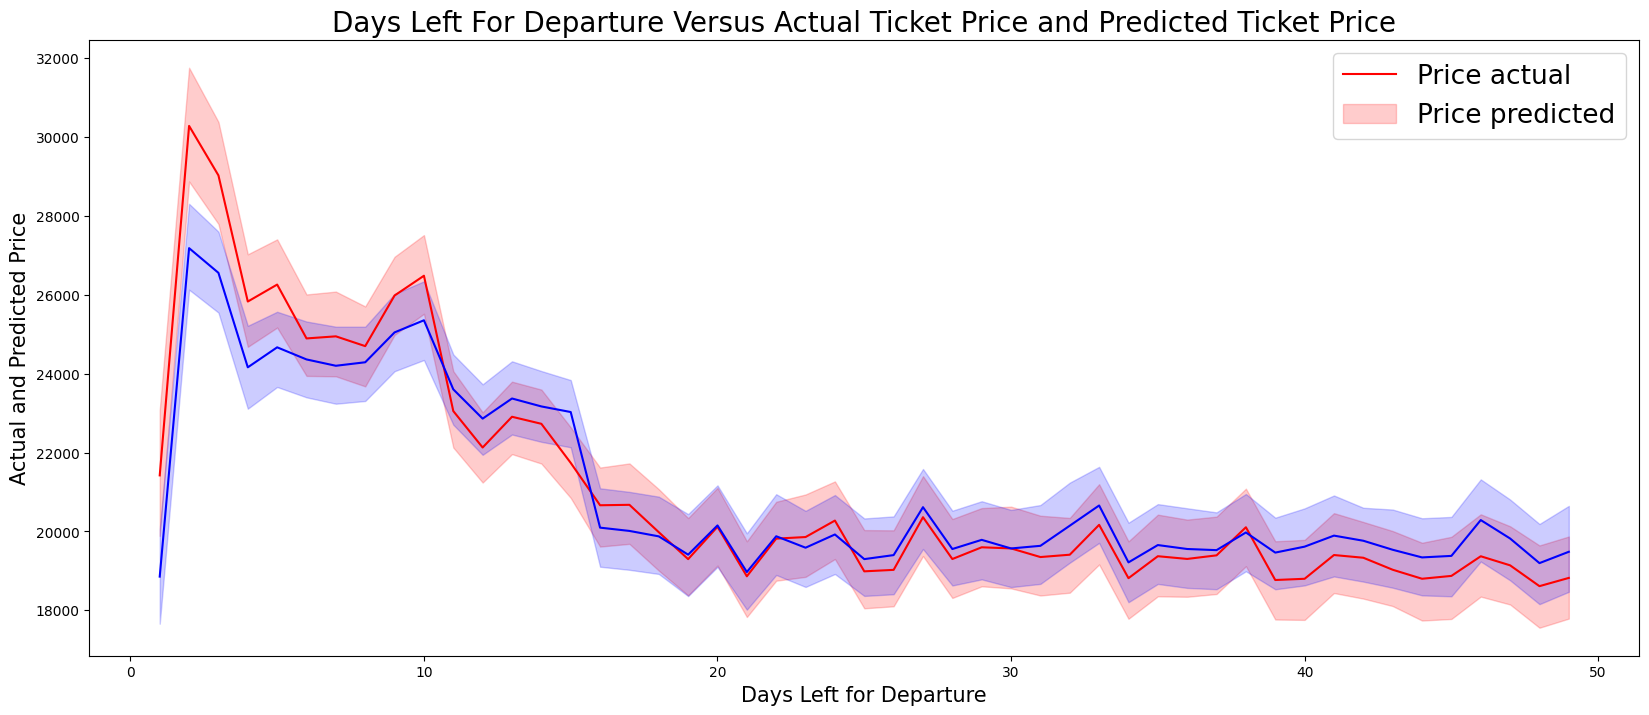

In [60]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

In [61]:
pd.DataFrame(
    {"feature": x.columns, "importance": modeldcr.feature_importances_}
).sort_values(by="importance", ascending=False).reset_index(drop=True)

,feature,importance
0,class,0.930274
1,duration,0.041878
2,flight,0.016893
3,days_left,0.008731
4,stops,0.000849
5,airline,0.000725
6,source_city,0.000650
7,departure_time,0.000000
8,arrival_time,0.000000
9,destination_city,0.000000


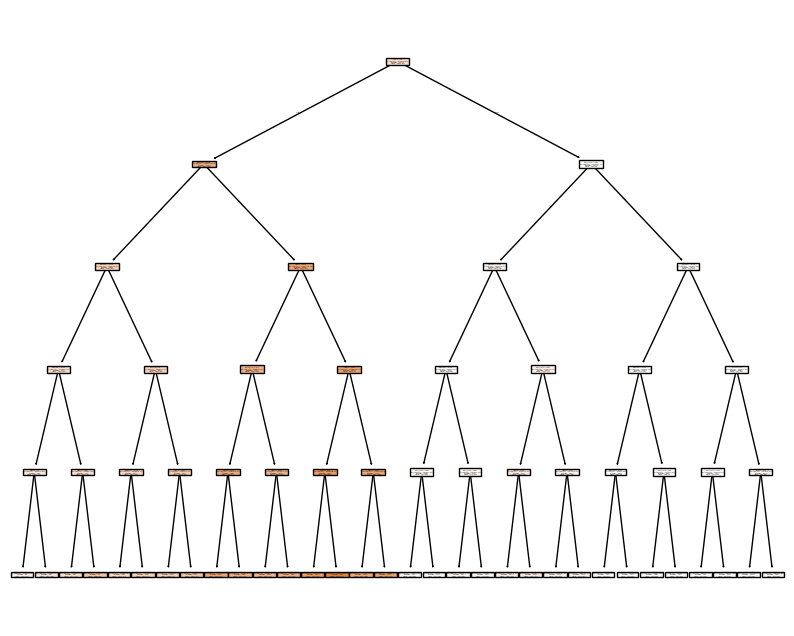

In [63]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(modeldcr, feature_names=x.columns, filled=True)
plt.show()

In [67]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modeldcr,
                          out_file=None,
                          feature_names=x.columns,
                          filled=True)

graph = graphviz.Source(dot_data)
graph.render("flight_tree", format="dot")

'flight_tree.dot'

In [ ]:
# dot -Tpng flight_tree.dot -o flight_tree.png в командере